In [2]:
import pandas as pd
import numpy as np
from datetime import datetime

# 먼저 날짜 데이터가 포함된 원본 데이터에서 published_date열을 datetime 형식으로 변환한다

In [ ]:
df= pd.read_pickle("../data/raw_data/pension_news.pkl")

In [18]:
df['published_date']= pd.to_datetime(df['published_date'], errors='coerce', utc=True)

In [19]:
pd.isnull(df['published_date']).sum()

10755

# 한글화

In [20]:
import re

In [21]:
from tqdm import trange, notebook

In [22]:
# 제목, 본문, 댓글의 한글화
# 댓글 개수의 숫자화
for i in notebook.tqdm(range(len(df))):
    # title에서 영문 대소문자, 한글, 숫자, 공백 문자를 제외한 모든 문자를 삭제
    df['title'][i] = re.sub("[^0-9a-zA-Zㄱ-ㅎㅏ-ㅣ가-힣 ]", '', str(df['title'][i]))
    
    # doc에서 영문 대소문자, 한글, 숫자, 공백 문자를 제외한 모든 문자를 삭제
    df['doc'][i] = re.sub("[^0-9a-zA-Zㄱ-ㅎㅏ-ㅣ가-힣 ]", '', str(df['doc'][i]))

  0%|          | 0/58089 [00:00<?, ?it/s]

/tmp/ipykernel_3384/3388914019.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['title'][i] = re.sub("[^0-9a-zA-Zㄱ-ㅎㅏ-ㅣ가-힣 ]", '', str(df['title'][i]))
/tmp/ipykernel_3384/3388914019.py:5: SettingWithCopyWarning: 
A value is trying to 

## **결측 값 drop**

In [23]:
from tqdm import trange, notebook

In [24]:
for i in trange(len(df)): # 본문
    if (len(df['doc'][i]) < 2 or df['doc'][i].isspace() == True) or (len(df['title'][i]) < 2 or df['title'][i].isspace() == True): # 문서 내용이 두글자 미만이나 공백문서로만 되있는 경우 결측값 처리
        df = df.drop(i) # 해당 행 삭제
print("ok")

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 58089/58089 [00:16<00:00, 3553.97it/s]

ok


In [25]:
df.shape

(52029, 4)

In [26]:
df= df.reset_index(drop=True)
df.head()

,title,doc,published_date,ch
0,실직 중 지역가입자국민연금 보험료 50최대 12개월 지원,이데일리 양희동 기자 보건복지부는 다음달 1일부터 국민연금 지역가입자 중 사업중단실...,2022-06-30 01:17:29+00:00,naver
1,국민연금 4월 말 수익률 379전월보다 악화,신혜선 인생은 길고 역할은 많아요,2022-06-29 06:36:43+00:00,naver
2,포착 상식 있는 정부라면 건강보험국민연금 책임부터 다해야,30일 오전 서울 용산 대통령 집무실 앞에서 열린 국민연금건강보험 국가 책임 강화 ...,2022-06-30 03:08:35+00:00,naver
3,연금 200만원 받는 70대 피부양자 9월부턴 건보료 낸다얼마,정부가 올해 9월부터 소득이 많은데도 보험료를 내지 않는 건강보험 피부양자 27만3...,2022-06-29 08:23:07+00:00,naver
4,국민의힘 연금 토론회 국민연금 더 내고 늦게 받아야,연금개혁 방향 더 내고 늦게 받아야 주장 제기국민의힘 정부 3대 개혁 과제로 연금...,2022-06-29 07:43:01+00:00,naver


In [27]:
df

,title,doc,published_date,ch
0,실직 중 지역가입자국민연금 보험료 50최대 12개월 지원,이데일리 양희동 기자 보건복지부는 다음달 1일부터 국민연금 지역가입자 중 사업중단실...,2022-06-30 01:17:29+00:00,naver
1,국민연금 4월 말 수익률 379전월보다 악화,신혜선 인생은 길고 역할은 많아요,2022-06-29 06:36:43+00:00,naver
2,포착 상식 있는 정부라면 건강보험국민연금 책임부터 다해야,30일 오전 서울 용산 대통령 집무실 앞에서 열린 국민연금건강보험 국가 책임 강화 ...,2022-06-30 03:08:35+00:00,naver
3,연금 200만원 받는 70대 피부양자 9월부턴 건보료 낸다얼마,정부가 올해 9월부터 소득이 많은데도 보험료를 내지 않는 건강보험 피부양자 27만3...,2022-06-29 08:23:07+00:00,naver
4,국민의힘 연금 토론회 국민연금 더 내고 늦게 받아야,연금개혁 방향 더 내고 늦게 받아야 주장 제기국민의힘 정부 3대 개혁 과제로 연금...,2022-06-29 07:43:01+00:00,naver
...,...,...,...,...
52024,연금특위 자문위 국민연금 보험료율 수급개시 연령 상향해야 TF사진관,연금특위 자문위 국민연금 보험료율 수급개시 연령 상향해야 TF사진관입력 202303...,2023-03-29 07:31:58+00:00,naver
52025,진옥동에 반대표 던진 국민연금업계 반응은 글쎄,진옥동에 반대표 던진 국민연금업계 반응은 글쎄입력 20230317 1506 수정 ...,2023-03-17 06:06:59+00:00,naver
52026,하나금융 주총 이승열 행장 비상임이사 선임분기배당 위한 정관변경,하나금융 주총 이승열 행장 비상임이사 선임분기배당 위한 정관변경입력 20230324...,2023-03-24 04:42:45+00:00,naver
52027,비즈토크상 닻 올리기 전 몰아치는 폭풍우KT 윤경림호 무사히 출범할까,비즈토크상 닻 올리기 전 몰아치는 폭풍우KT 윤경림호 무사히 출범할까입력 20230...,2023-03-12 03:00:02+00:00,naver


In [ ]:
import pandas as pd

df = pd.read_pickle('../data/analysis_data/news/df_publish_date_nona1.pkl')
df

In [ ]:
df= pd.read_pickle("../data/analysis_data/news/df_publish_date_nona1.pkl")
df

,title,doc,published_date,ch
0,실직 중 지역가입자국민연금 보험료 50최대 12개월 지원,이데일리 양희동 기자 보건복지부는 다음달 1일부터 국민연금 지역가입자 중 사업중단실...,2022-06-30 01:17:29+00:00,naver
1,국민연금 4월 말 수익률 379전월보다 악화,신혜선 인생은 길고 역할은 많아요,2022-06-29 06:36:43+00:00,naver
2,포착 상식 있는 정부라면 건강보험국민연금 책임부터 다해야,30일 오전 서울 용산 대통령 집무실 앞에서 열린 국민연금건강보험 국가 책임 강화 ...,2022-06-30 03:08:35+00:00,naver
3,연금 200만원 받는 70대 피부양자 9월부턴 건보료 낸다얼마,정부가 올해 9월부터 소득이 많은데도 보험료를 내지 않는 건강보험 피부양자 27만3...,2022-06-29 08:23:07+00:00,naver
4,국민의힘 연금 토론회 국민연금 더 내고 늦게 받아야,연금개혁 방향 더 내고 늦게 받아야 주장 제기국민의힘 정부 3대 개혁 과제로 연금...,2022-06-29 07:43:01+00:00,naver
...,...,...,...,...
52024,연금특위 자문위 국민연금 보험료율 수급개시 연령 상향해야 TF사진관,연금특위 자문위 국민연금 보험료율 수급개시 연령 상향해야 TF사진관입력 202303...,2023-03-29 07:31:58+00:00,naver
52025,진옥동에 반대표 던진 국민연금업계 반응은 글쎄,진옥동에 반대표 던진 국민연금업계 반응은 글쎄입력 20230317 1506 수정 ...,2023-03-17 06:06:59+00:00,naver
52026,하나금융 주총 이승열 행장 비상임이사 선임분기배당 위한 정관변경,하나금융 주총 이승열 행장 비상임이사 선임분기배당 위한 정관변경입력 20230324...,2023-03-24 04:42:45+00:00,naver
52027,비즈토크상 닻 올리기 전 몰아치는 폭풍우KT 윤경림호 무사히 출범할까,비즈토크상 닻 올리기 전 몰아치는 폭풍우KT 윤경림호 무사히 출범할까입력 20230...,2023-03-12 03:00:02+00:00,naver


# 감성분석 결과 sentiword, values, score를 삽입한 데이터프레임을 불러온뒤 감성분석 결과를 바탕으로 sentiment열을 추가한다 

In [30]:
# 라이브러리 불러오기
import numpy as np
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk # 자연어 처리를 위한 파이썬 패키지
from nltk.util import ngrams # 문자열에서 N개의 연속된 요소를 추출하는 방법

In [ ]:
df= pd.read_pickle("../data/analysis_data/news/pension_news_total_docs1.pkl")

In [32]:
df.head()

,title,doc,ch,title_token_list_pos,title_token_noun,doc_token_noun,doc_token_list_pos,doc_topic,sentiword,values,score
0,실직 중 지역가입자국민연금 보험료 50최대 12개월 지원,이데일리 양희동 기자 보건복지부는 다음달 1일부터 국민연금 지역가입자 중 사업중단실...,naver,"[(실직, NNG), (중, NNB), (지역, NNG), (가입자, NNG), (...","[실직, 지원]","[보건, 복지부, 중단, 실직, 휴직, 예외자, 지원, 종합, 운영, 개선, 방안,...","[(이데일리, NNP), (양희, NNP), (동, MM), (기자, NNG), (...",2,"[개선, 기대, 높다, 능하고, 대상, 도움, 부담, 소득, 약한, 어려움, 어려움...","[2, 1, 1, 2, 1, 1, -2, 1, -1, -2, -2, 1, 1, 1,...",0.157895
1,국민연금 4월 말 수익률 379전월보다 악화,신혜선 인생은 길고 역할은 많아요,naver,"[(국민연금, NNP), (4월, NNP), (말, NNG), (수익률, NNP),...","[4월, 수익률, 전월, 악화]","[인생, 역할]","[(신혜선, NNP), (인생, NNG), (은, JX), (길, VA), (고, ...",4,[],[],0.000000
2,포착 상식 있는 정부라면 건강보험국민연금 책임부터 다해야,30일 오전 서울 용산 대통령 집무실 앞에서 열린 국민연금건강보험 국가 책임 강화 ...,naver,"[(포착, NNG), (상식, NNP), (있, VV), (는, ETM), (정부,...","[포착, 상식, 정부, 건강보험, 책임]","[집무실, 건강보험, 국가, 책임, 강화, 의료, 민영화, 기자회견, 공공, 운수,...","[(30, SN), (일, NNB), (오전, NNP), (서울, NNP), (용산...",1,"[아니다, 전문가, 축하]","[-2, 1, 2]",0.333333
3,연금 200만원 받는 70대 피부양자 9월부턴 건보료 낸다얼마,정부가 올해 9월부터 소득이 많은데도 보험료를 내지 않는 건강보험 피부양자 27만3...,naver,"[(연금, NNP), (200, SN), (만원, NNP), (받, VV), (는,...","[피부, 9월, 보료]","[정부, 9월, 건강보험, 피부, 피부, 직장, 가족, 생계, 의존, 보료, 혜택,...","[(정부, NNG), (가, JKS), (올해, NNG), (9월, NNP), (부...",2,"[높은, 능력, 대상, 부담, 소득, 아니다, 없다, 인정, 제대로, 편안, 혜택,...","[1, 1, 1, -2, 1, -2, -1, 1, 1, 2, 1, 1]",0.416667
4,국민의힘 연금 토론회 국민연금 더 내고 늦게 받아야,연금개혁 방향 더 내고 늦게 받아야 주장 제기국민의힘 정부 3대 개혁 과제로 연금...,naver,"[(국민, NNG), (의, JKG), (힘, NNG), (연금, NNP), (토론...",[토론회],"[개혁, 방향, 주장, 제기, 정부, 개혁, 과제, 개혁, 이전, 정부, 안대, 비...","[(연금, NNP), (개혁, NNP), (방향, NNG), (더, MAG), (내...",1,"[개선, 대상, 부담, 비판, 소득, 어려운, 없다, 자신감, 젊은, 좋을, 중요한]","[2, 1, -2, -1, 1, -2, -1, 1, 2, 2, 1]",0.363636


In [33]:
# 감성 분석 결과를 바탕으로 긍정, 중립, 부정을 나타내는 sentiment 열 추가
senti = []

for i in range(len(df)):
    if df['score'].iloc[i] <= -0.4:
        senti.append(-1)     # -0.4 이하인 경우 부정적으로 판단, -1로 표시
    elif df['score'].iloc[i] <= 0.4:
        senti.append(0)      # -0.4 초과 0.4 이하인 경우 중립적으로 판단, 0으로 표시
    else:
        senti.append(1)      # 0.4 초과인 경우 긍정적으로 판단, 1로 표시
    
df['sentiment'] = senti

In [ ]:
import pickle

# 갱신된 데이터프레임 파일로 저장
f = open("../data/analysis_data/news/pension_news_total_docs2.pkl", "wb")
pickle.dump(df, f)
f.close()

In [ ]:
df= pd.read_pickle("../data/analysis_data/news/pension_news_total_docs2.pkl")

In [36]:
df

,title,doc,ch,title_token_list_pos,title_token_noun,doc_token_noun,doc_token_list_pos,doc_topic,sentiword,values,score,sentiment
0,실직 중 지역가입자국민연금 보험료 50최대 12개월 지원,이데일리 양희동 기자 보건복지부는 다음달 1일부터 국민연금 지역가입자 중 사업중단실...,naver,"[(실직, NNG), (중, NNB), (지역, NNG), (가입자, NNG), (...","[실직, 지원]","[보건, 복지부, 중단, 실직, 휴직, 예외자, 지원, 종합, 운영, 개선, 방안,...","[(이데일리, NNP), (양희, NNP), (동, MM), (기자, NNG), (...",2,"[개선, 기대, 높다, 능하고, 대상, 도움, 부담, 소득, 약한, 어려움, 어려움...","[2, 1, 1, 2, 1, 1, -2, 1, -1, -2, -2, 1, 1, 1,...",0.157895,0
1,국민연금 4월 말 수익률 379전월보다 악화,신혜선 인생은 길고 역할은 많아요,naver,"[(국민연금, NNP), (4월, NNP), (말, NNG), (수익률, NNP),...","[4월, 수익률, 전월, 악화]","[인생, 역할]","[(신혜선, NNP), (인생, NNG), (은, JX), (길, VA), (고, ...",4,[],[],0.000000,0
2,포착 상식 있는 정부라면 건강보험국민연금 책임부터 다해야,30일 오전 서울 용산 대통령 집무실 앞에서 열린 국민연금건강보험 국가 책임 강화 ...,naver,"[(포착, NNG), (상식, NNP), (있, VV), (는, ETM), (정부,...","[포착, 상식, 정부, 건강보험, 책임]","[집무실, 건강보험, 국가, 책임, 강화, 의료, 민영화, 기자회견, 공공, 운수,...","[(30, SN), (일, NNB), (오전, NNP), (서울, NNP), (용산...",1,"[아니다, 전문가, 축하]","[-2, 1, 2]",0.333333,0
3,연금 200만원 받는 70대 피부양자 9월부턴 건보료 낸다얼마,정부가 올해 9월부터 소득이 많은데도 보험료를 내지 않는 건강보험 피부양자 27만3...,naver,"[(연금, NNP), (200, SN), (만원, NNP), (받, VV), (는,...","[피부, 9월, 보료]","[정부, 9월, 건강보험, 피부, 피부, 직장, 가족, 생계, 의존, 보료, 혜택,...","[(정부, NNG), (가, JKS), (올해, NNG), (9월, NNP), (부...",2,"[높은, 능력, 대상, 부담, 소득, 아니다, 없다, 인정, 제대로, 편안, 혜택,...","[1, 1, 1, -2, 1, -2, -1, 1, 1, 2, 1, 1]",0.416667,1
4,국민의힘 연금 토론회 국민연금 더 내고 늦게 받아야,연금개혁 방향 더 내고 늦게 받아야 주장 제기국민의힘 정부 3대 개혁 과제로 연금...,naver,"[(국민, NNG), (의, JKG), (힘, NNG), (연금, NNP), (토론...",[토론회],"[개혁, 방향, 주장, 제기, 정부, 개혁, 과제, 개혁, 이전, 정부, 안대, 비...","[(연금, NNP), (개혁, NNP), (방향, NNG), (더, MAG), (내...",1,"[개선, 대상, 부담, 비판, 소득, 어려운, 없다, 자신감, 젊은, 좋을, 중요한]","[2, 1, -2, -1, 1, -2, -1, 1, 2, 2, 1]",0.363636,0
...,...,...,...,...,...,...,...,...,...,...,...,...
52024,연금특위 자문위 국민연금 보험료율 수급개시 연령 상향해야 TF사진관,연금특위 자문위 국민연금 보험료율 수급개시 연령 상향해야 TF사진관입력 202303...,naver,"[(연금, NNG), (특위, NNG), (자문위, NNG), (국민연금, NNP)...","[특위, 자문위, 개시, 상향, 사진관]","[특위, 자문위, 개시, 상향, 사진관, 입력, 수정, 주호영, 국회, 개혁, 특별...","[(연금, NNG), (특위, NNG), (자문위, NNG), (국민연금, NNP)...",1,"[상한, 소득]","[-2, 1]",-0.500000,-1
52025,진옥동에 반대표 던진 국민연금업계 반응은 글쎄,진옥동에 반대표 던진 국민연금업계 반응은 글쎄입력 20230317 1506 수정 ...,naver,"[(지, VX), (ㄴ, ETM), (옥동, NNP), (에, JKB), (반대표,...","[옥동, 반대표, 업계, 반응]","[옥동, 반대표, 업계, 반응, 수정, 수탁자, 책임, 전문, 위원회, 위원회, 신...","[(지, VX), (ㄴ, ETM), (옥동, NNP), (에, JKB), (반대표,...",3,"[가치, 고한, 높은, 사모, 성을, 소홀, 자책, 함께, 훼손]","[1, -2, 1, 2, 0, -2, -1, 1, -1]",-0.111111,0
52026,하나금융 주총 이승열 행장 비상임이사 선임분기배당 위한 정관변경,하나금융 주총 이승열 행장 비상임이사 선임분기배당 위한 정관변경입력 20230324...,naver,"[(하나, NR), (금융, NNP), (주총, NNG), (이승열, NNP), (...","[금융, 이승열, 행장, 비상, 이사, 선임, 분기, 배당, 정관]","[금융, 이승열, 행장, 비상, 이사, 선임, 분기, 배당, 정관, 입력, 수정, ...","[(하나, NR), (금융, NNP), (주총, NNG), (이승열, NNP), (...",3,"[개선, 성이, 소홀, 자책]","[2, 0, -2, -1]",-0.250000,0
52027,비즈토크상 닻 올리기 전 몰아치는 폭풍우KT 윤경림호 무사히 출범할까,비즈토크상 닻 올리기 전 몰아치는 폭풍우KT 윤경림호 무사히 출범할까입력 20230...,naver,"[(비즈, NNP), (토크, NNP), (상, XSN), (닻, NNG), (올리...","[비즈, 토크, 폭풍우, KT, 윤경, 출범]","[비즈, 토크, 폭풍우, KT, 윤경, 출범, 입력, 수정, KT, 윤경, 그룹, ...","[(비즈, NNP), (토크, NNP), (상, XSN), (닻, NNG), (올리...",3,"[가치, 다침, 못하다, 못한, 무사히, 발전, 불편, 불편한, 불황, 비판, 생생...","[1, -2, -2, -1, 1, 1, -2, -2, -2, -1, 1, 0, 0,...",-0.107143,0


# topic 0에 대한 긍부정 그래프

/tmp/ipykernel_3938/3841757419.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  positive = topic_data.resample('3M').apply(lambda x: (x['sentiment'] == 1).mean())
/tmp/ipykernel_3938/3841757419.py:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  negative = topic_data.resample('3M').apply(lambda x: (x['sentiment'] == -1).mean())


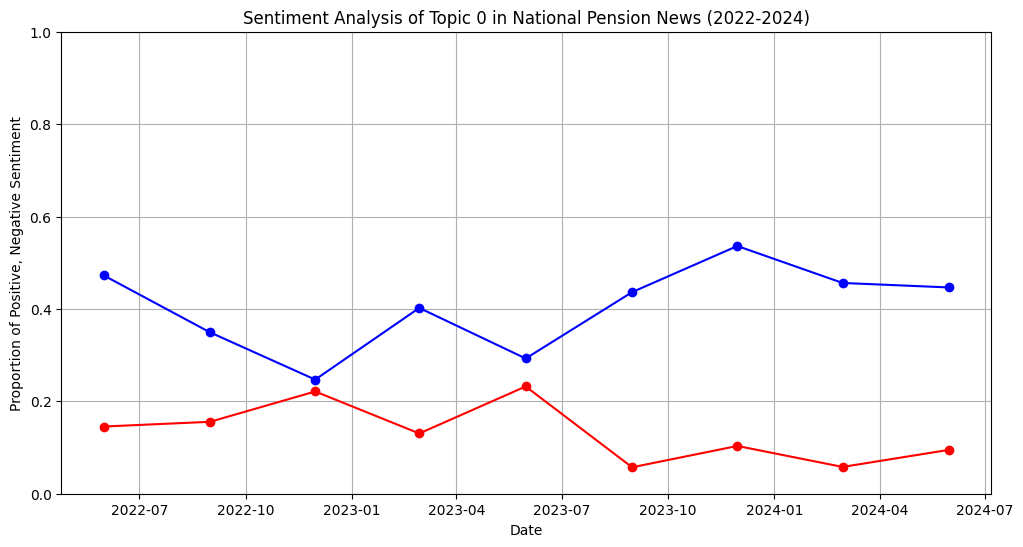

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 데이터 로드
# 감성분석 및 토픽 분류가 완료된 데이터 로드
topic_sentiment_data = pd.read_pickle('../data/analysis_data/news/pension_news_total_docs2.pkl')

# 새 원본 데이터 로드 (날짜 데이터 포함)
original_data = pd.read_pickle('../data/analysis_data/news/df_publish_date_nona1.pkl')

# 2. 고유 식별자 생성
# 예시로 'title'과 'doc'을 기준으로 고유 식별자를 생성
original_data['uid'] = original_data['title'] + original_data['doc']
topic_sentiment_data['uid'] = topic_sentiment_data['title'] + topic_sentiment_data['doc']

# 3. 데이터 병합
merged_data = pd.merge(topic_sentiment_data, original_data[['uid', 'published_date']], on='uid', how='left')

# 4. 결측값 처리
merged_data.dropna(subset=['published_date'], inplace=True)

# 'published_date' 컬럼을 datetime 형식으로 변환
# merged_data['published_date'] = pd.to_datetime(merged_data['published_date'])

# 5. 데이터 전처리
start_date = '2022-05-01'
end_date = '2024-04-30'
filtered_data = merged_data[(merged_data['published_date'] >= start_date) & (merged_data['published_date'] <= end_date)]

# 특정 토픽에 대한 데이터 필터링 (예: topic 1)
topic_data = filtered_data[filtered_data['doc_topic'] == 0]

# 3개월 단위로 데이터 그룹화
topic_data.set_index('published_date', inplace=True)
positive = topic_data.resample('3M').apply(lambda x: (x['sentiment'] == 1).mean())

negative = topic_data.resample('3M').apply(lambda x: (x['sentiment'] == -1).mean())


# 6. 감성 분석 결과 계산
# 그룹 내에서 긍정적인 문서 비율 계산은 이미 apply에서 처리됨

# 7. 시계열 그래프 생성
plt.figure(figsize=(12, 6))
plt.plot(topic_data.index, positive, marker='o', linestyle='-', color='blue')
plt.plot(topic_data.index, negative, marker='o', linestyle='-', color='red')
plt.title('Sentiment Analysis of Topic 0 in National Pension News (2022-2024)')
plt.xlabel('Date')
plt.ylabel('Proportion of Positive, Negative Sentiment')
plt.ylim(0,1)
plt.grid(True)
plt.show()


# topic 1에 대한 긍부정 그래프

/tmp/ipykernel_3938/602429497.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  positive = topic_data.resample('3M').apply(lambda x: (x['sentiment'] == 1).mean())
/tmp/ipykernel_3938/602429497.py:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  negative = topic_data.resample('3M').apply(lambda x: (x['sentiment'] == -1).mean())


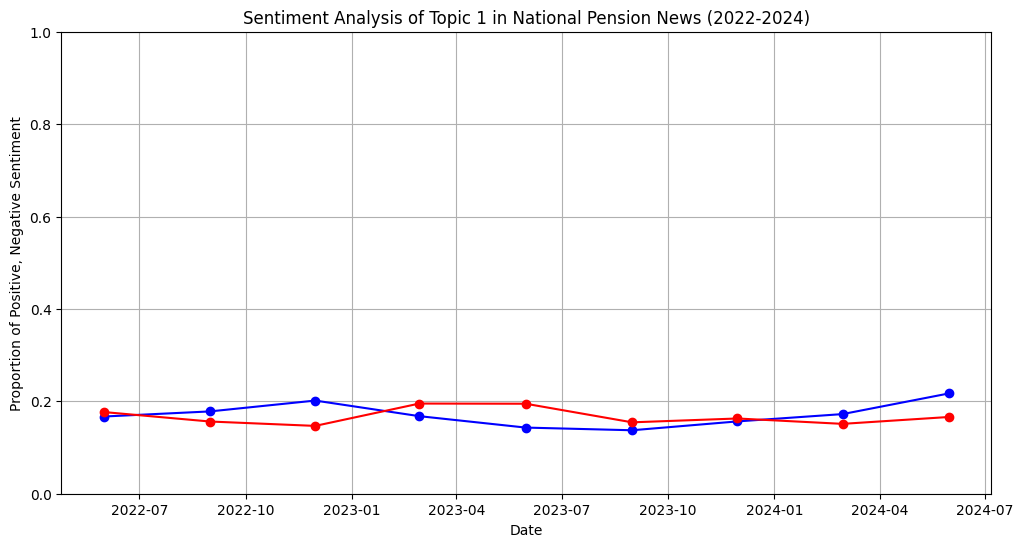

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 데이터 로드
# 감성분석 및 토픽 분류가 완료된 데이터 로드
topic_sentiment_data = pd.read_pickle('../data/analysis_data/news/pension_news_total_docs2.pkl')

# 새 원본 데이터 로드 (날짜 데이터 포함)
original_data = pd.read_pickle('../data/analysis_data/news/df_publish_date_nona1.pkl')

# 2. 고유 식별자 생성
# 예시로 'title'과 'doc'을 기준으로 고유 식별자를 생성
original_data['uid'] = original_data['title'] + original_data['doc']
topic_sentiment_data['uid'] = topic_sentiment_data['title'] + topic_sentiment_data['doc']

# 3. 데이터 병합
merged_data = pd.merge(topic_sentiment_data, original_data[['uid', 'published_date']], on='uid', how='left')

# 4. 결측값 처리
merged_data.dropna(subset=['published_date'], inplace=True)

# 'published_date' 컬럼을 datetime 형식으로 변환
# merged_data['published_date'] = pd.to_datetime(merged_data['published_date'])

# 5. 데이터 전처리
start_date = '2022-05-01'
end_date = '2024-04-30'
filtered_data = merged_data[(merged_data['published_date'] >= start_date) & (merged_data['published_date'] <= end_date)]

# 특정 토픽에 대한 데이터 필터링 (예: topic 1)
topic_data = filtered_data[filtered_data['doc_topic'] == 1]

# 3개월 단위로 데이터 그룹화
topic_data.set_index('published_date', inplace=True)
positive = topic_data.resample('3M').apply(lambda x: (x['sentiment'] == 1).mean())

negative = topic_data.resample('3M').apply(lambda x: (x['sentiment'] == -1).mean())


# 6. 감성 분석 결과 계산
# 그룹 내에서 긍정적인 문서 비율 계산은 이미 apply에서 처리됨

# 7. 시계열 그래프 생성
plt.figure(figsize=(12, 6))
plt.plot(topic_data.index, positive, marker='o', linestyle='-', color='blue')
plt.plot(topic_data.index, negative, marker='o', linestyle='-', color='red')
plt.title('Sentiment Analysis of Topic 1 in National Pension News (2022-2024)')
plt.xlabel('Date')
plt.ylabel('Proportion of Positive, Negative Sentiment')
plt.ylim(0,1)
plt.grid(True)
plt.show()


# topic 2에 대한 긍부정 그래프

/tmp/ipykernel_3938/3931550154.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  positive = topic_data.resample('3M').apply(lambda x: (x['sentiment'] == 1).mean())
/tmp/ipykernel_3938/3931550154.py:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  negative = topic_data.resample('3M').apply(lambda x: (x['sentiment'] == -1).mean())


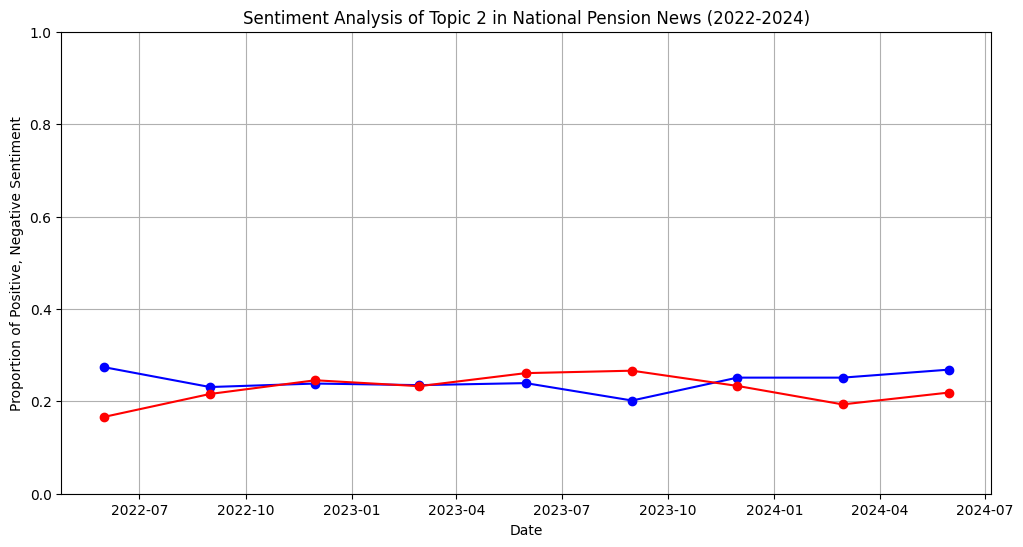

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 데이터 로드
# 감성분석 및 토픽 분류가 완료된 데이터 로드
topic_sentiment_data = pd.read_pickle('../data/analysis_data/news/pension_news_total_docs2.pkl')

# 새 원본 데이터 로드 (날짜 데이터 포함)
original_data = pd.read_pickle('../data/analysis_data/news/df_publish_date_nona1.pkl')

# 2. 고유 식별자 생성
# 예시로 'title'과 'doc'을 기준으로 고유 식별자를 생성
original_data['uid'] = original_data['title'] + original_data['doc']
topic_sentiment_data['uid'] = topic_sentiment_data['title'] + topic_sentiment_data['doc']

# 3. 데이터 병합
merged_data = pd.merge(topic_sentiment_data, original_data[['uid', 'published_date']], on='uid', how='left')

# 4. 결측값 처리
merged_data.dropna(subset=['published_date'], inplace=True)

# 'published_date' 컬럼을 datetime 형식으로 변환
# merged_data['published_date'] = pd.to_datetime(merged_data['published_date'])

# 5. 데이터 전처리
start_date = '2022-05-01'
end_date = '2024-04-30'
filtered_data = merged_data[(merged_data['published_date'] >= start_date) & (merged_data['published_date'] <= end_date)]

# 특정 토픽에 대한 데이터 필터링 (예: topic 1)
topic_data = filtered_data[filtered_data['doc_topic'] == 2]

# 3개월 단위로 데이터 그룹화
topic_data.set_index('published_date', inplace=True)
positive = topic_data.resample('3M').apply(lambda x: (x['sentiment'] == 1).mean())

negative = topic_data.resample('3M').apply(lambda x: (x['sentiment'] == -1).mean())


# 6. 감성 분석 결과 계산
# 그룹 내에서 긍정적인 문서 비율 계산은 이미 apply에서 처리됨

# 7. 시계열 그래프 생성
plt.figure(figsize=(12, 6))
plt.plot(topic_data.index, positive, marker='o', linestyle='-', color='blue')
plt.plot(topic_data.index, negative, marker='o', linestyle='-', color='red')
plt.title('Sentiment Analysis of Topic 2 in National Pension News (2022-2024)')
plt.xlabel('Date')
plt.ylabel('Proportion of Positive, Negative Sentiment')
plt.ylim(0,1)
plt.grid(True)
plt.show()


# topic 3에 대한 긍부정 그래프

/tmp/ipykernel_3938/1340551765.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  positive = topic_data.resample('3M').apply(lambda x: (x['sentiment'] == 1).mean())
/tmp/ipykernel_3938/1340551765.py:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  negative = topic_data.resample('3M').apply(lambda x: (x['sentiment'] == -1).mean())


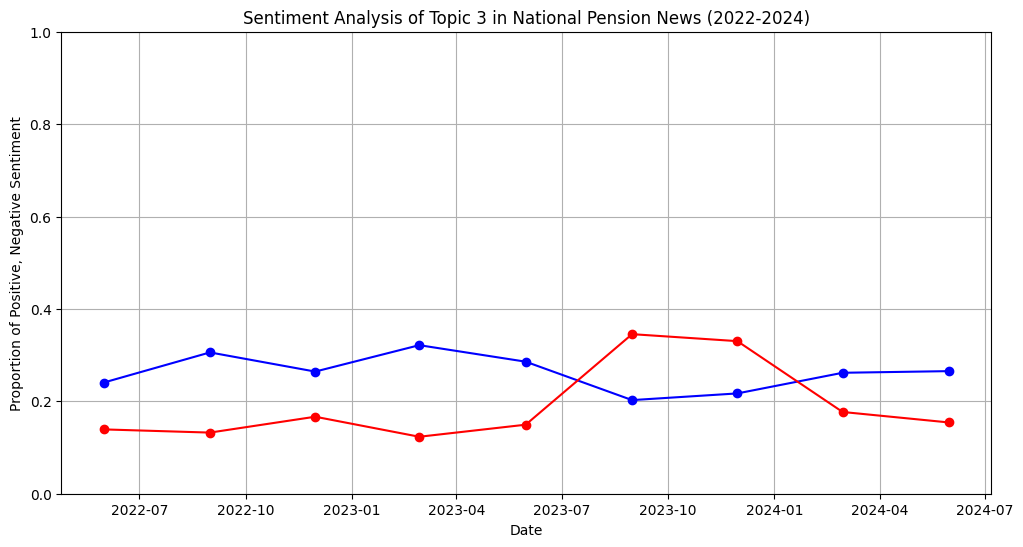

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 데이터 로드
# 감성분석 및 토픽 분류가 완료된 데이터 로드
topic_sentiment_data = pd.read_pickle('../data/analysis_data/news/pension_news_total_docs2.pkl')

# 새 원본 데이터 로드 (날짜 데이터 포함)
original_data = pd.read_pickle('../data/analysis_data/news/df_publish_date_nona1.pkl')

# 2. 고유 식별자 생성
# 예시로 'title'과 'doc'을 기준으로 고유 식별자를 생성
original_data['uid'] = original_data['title'] + original_data['doc']
topic_sentiment_data['uid'] = topic_sentiment_data['title'] + topic_sentiment_data['doc']

# 3. 데이터 병합
merged_data = pd.merge(topic_sentiment_data, original_data[['uid', 'published_date']], on='uid', how='left')

# 4. 결측값 처리
merged_data.dropna(subset=['published_date'], inplace=True)

# 'published_date' 컬럼을 datetime 형식으로 변환
# merged_data['published_date'] = pd.to_datetime(merged_data['published_date'])

# 5. 데이터 전처리
start_date = '2022-05-01'
end_date = '2024-04-30'
filtered_data = merged_data[(merged_data['published_date'] >= start_date) & (merged_data['published_date'] <= end_date)]

# 특정 토픽에 대한 데이터 필터링 (예: topic 1)
topic_data = filtered_data[filtered_data['doc_topic'] == 3]

# 3개월 단위로 데이터 그룹화
topic_data.set_index('published_date', inplace=True)
positive = topic_data.resample('3M').apply(lambda x: (x['sentiment'] == 1).mean())

negative = topic_data.resample('3M').apply(lambda x: (x['sentiment'] == -1).mean())


# 6. 감성 분석 결과 계산
# 그룹 내에서 긍정적인 문서 비율 계산은 이미 apply에서 처리됨

# 7. 시계열 그래프 생성
plt.figure(figsize=(12, 6))
plt.plot(topic_data.index, positive, marker='o', linestyle='-', color='blue')
plt.plot(topic_data.index, negative, marker='o', linestyle='-', color='red')
plt.title('Sentiment Analysis of Topic 3 in National Pension News (2022-2024)')
plt.xlabel('Date')
plt.ylabel('Proportion of Positive, Negative Sentiment')
plt.ylim(0,1)
plt.grid(True)
plt.show()


# 모든 topic에 대한 긍부정 그래프

/tmp/ipykernel_3938/2280033165.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  positive = topic_data.resample('3M').apply(lambda x: (x['sentiment'] == 1).mean())
/tmp/ipykernel_3938/2280033165.py:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  negative = topic_data.resample('3M').apply(lambda x: (x['sentiment'] == -1).mean())


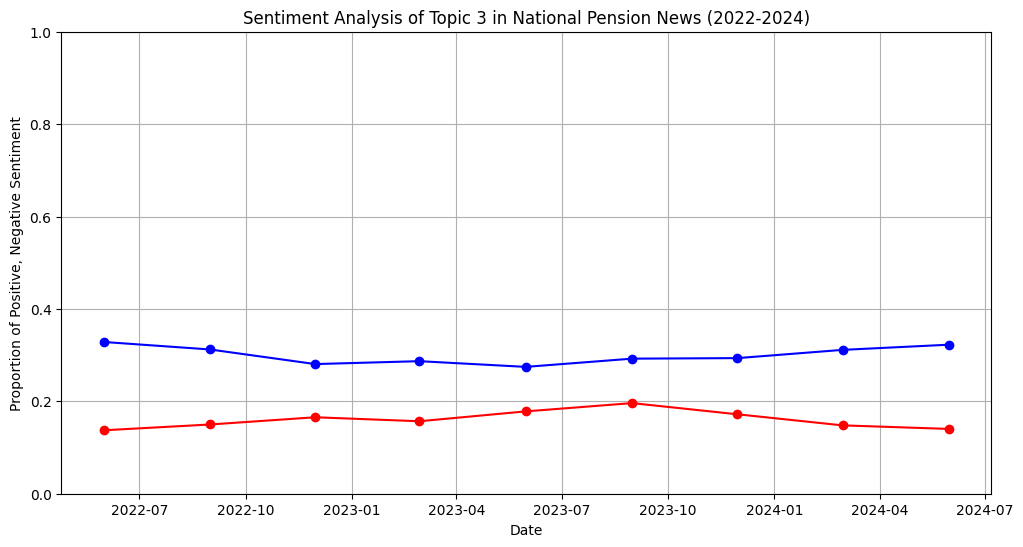

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 데이터 로드
# 감성분석 및 토픽 분류가 완료된 데이터 로드
topic_sentiment_data = pd.read_pickle('../data/analysis_data/news/pension_news_total_docs2.pkl')

# 새 원본 데이터 로드 (날짜 데이터 포함)
original_data = pd.read_pickle('../data/analysis_data/news/df_publish_date_nona1.pkl')

# 2. 고유 식별자 생성
# 예시로 'title'과 'doc'을 기준으로 고유 식별자를 생성
original_data['uid'] = original_data['title'] + original_data['doc']
topic_sentiment_data['uid'] = topic_sentiment_data['title'] + topic_sentiment_data['doc']

# 3. 데이터 병합
merged_data = pd.merge(topic_sentiment_data, original_data[['uid', 'published_date']], on='uid', how='left')

# 4. 결측값 처리
merged_data.dropna(subset=['published_date'], inplace=True)

# 'published_date' 컬럼을 datetime 형식으로 변환
# merged_data['published_date'] = pd.to_datetime(merged_data['published_date'])

# 5. 데이터 전처리
start_date = '2022-05-01'
end_date = '2024-04-30'
filtered_data = merged_data[(merged_data['published_date'] >= start_date) & (merged_data['published_date'] <= end_date)]

# 특정 토픽에 대한 데이터 필터링 (예: topic 1)
topic_data = filtered_data[(filtered_data['doc_topic'] == 0)|(filtered_data['doc_topic'] == 1)|(filtered_data['doc_topic'] == 2)|(filtered_data['doc_topic'] == 3) | (filtered_data['doc_topic'] == 4)]

# 3개월 단위로 데이터 그룹화
topic_data.set_index('published_date', inplace=True)
positive = topic_data.resample('3M').apply(lambda x: (x['sentiment'] == 1).mean())

negative = topic_data.resample('3M').apply(lambda x: (x['sentiment'] == -1).mean())


# 6. 감성 분석 결과 계산
# 그룹 내에서 긍정적인 문서 비율 계산은 이미 apply에서 처리됨

# 7. 시계열 그래프 생성
plt.figure(figsize=(12, 6))
plt.plot(topic_data.index, positive, marker='o', linestyle='-', color='blue')
plt.plot(topic_data.index, negative, marker='o', linestyle='-', color='red')
plt.title('Sentiment Analysis of Topic 3 in National Pension News (2022-2024)')
plt.xlabel('Date')
plt.ylabel('Proportion of Positive, Negative Sentiment')
plt.ylim(0,1)
plt.grid(True)
plt.show()
